In [95]:
!pip install prophet


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import random

from sklearn.metrics import mean_absolute_percentage_error

In [97]:
df = pd.read_excel(f"Groceries_Sales_data.xlsx",index_col=0)


In [98]:
df.head()

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0


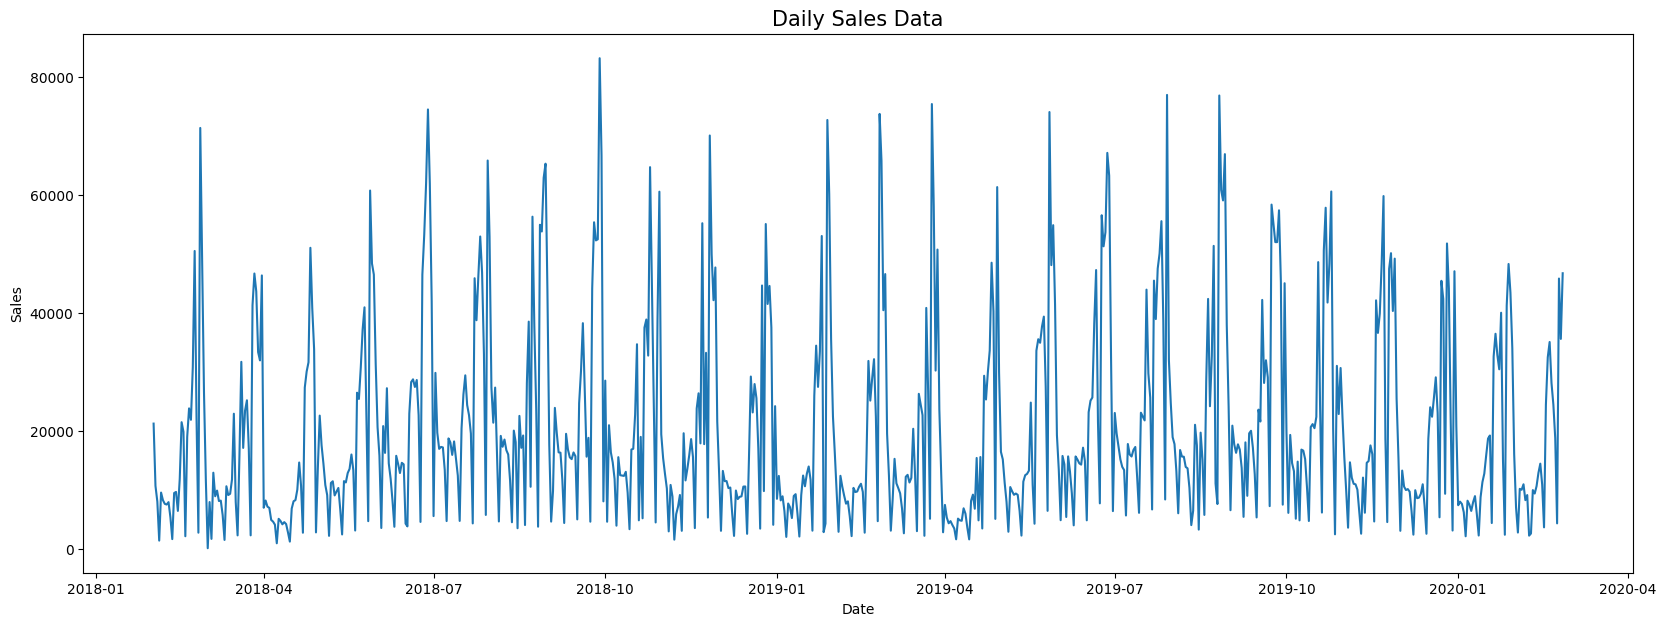

In [99]:
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Date", y="Sales", data=df)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()


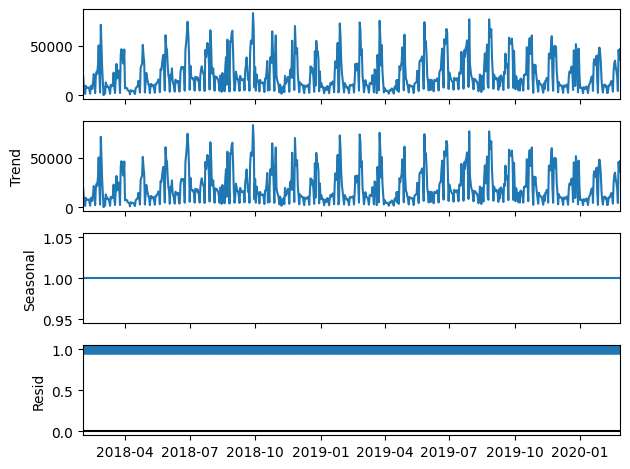

In [100]:
result_2 = seasonal_decompose(df, model='multiplicative', period=1)
result_2.plot()
plt.show()

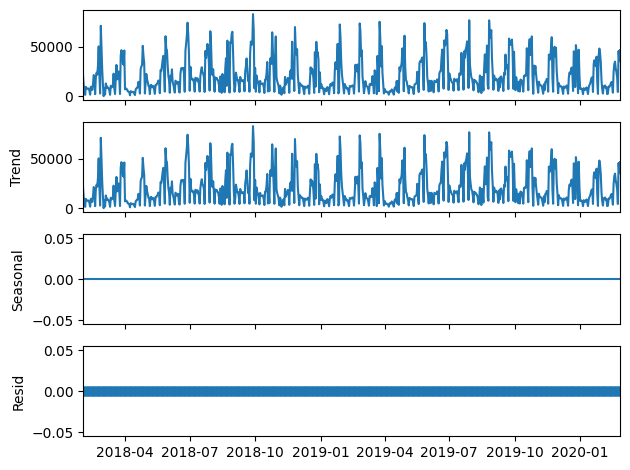

In [101]:
result_3 = seasonal_decompose(df, model='additive', period=1)
result_3.plot()
plt.show()

In [102]:
df.index = pd.to_datetime(df.index)

In [103]:
df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


In [104]:
y = df["Sales"]
y.name = "Sales"

In [105]:
seasonal_df = y.to_frame()
seasonal_df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


<AxesSubplot: xlabel='Date'>

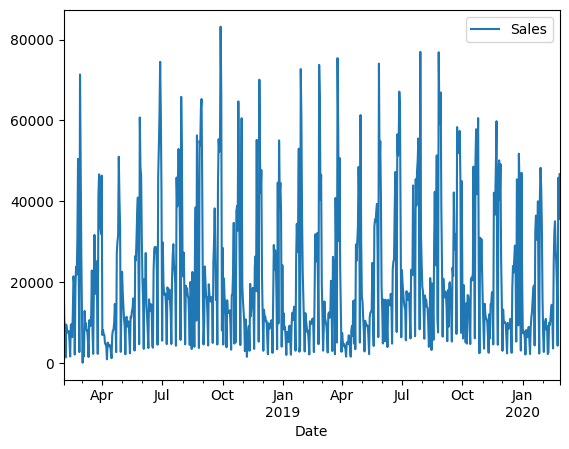

In [106]:
seasonal_df.plot()

In [107]:
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=7, center=True).mean()
seasonal_df

,Sales,trend
Date,,
2018-02-01,21199.0,NaN
2018-02-02,10634.0,NaN
2018-02-03,7966.0,NaN
2018-02-04,1353.0,9491.000000
2018-02-05,9497.0,7529.857143
...,...,...
2020-02-22,18723.1,27416.171429
2020-02-23,4274.9,29082.042857
2020-02-24,45805.7,NaN


In [108]:
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]
seasonal_df.head(10)

,Sales,trend,detrended
Date,,,
2018-02-01,21199.0,NaN,NaN
2018-02-02,10634.0,NaN,NaN
2018-02-03,7966.0,NaN,NaN
2018-02-04,1353.0,9491.000000,-8138.000000
2018-02-05,9497.0,7529.857143,1967.142857
2018-02-06,8207.0,7136.142857,1070.857143
2018-02-07,7581.0,6757.285714,823.714286
2018-02-08,7471.0,6793.285714,677.714286
2018-02-09,7878.0,6782.142857,1095.857143


In [109]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)


,Sales,trend,detrended,month,seasonality
Date,,,,,
2018-02-01,21199.0,NaN,NaN,2,-112.66203
2018-02-02,10634.0,NaN,NaN,2,-112.66203
2018-02-03,7966.0,NaN,NaN,2,-112.66203
2018-02-04,1353.0,9491.000000,-8138.000000,2,-112.66203
2018-02-05,9497.0,7529.857143,1967.142857,2,-112.66203
2018-02-06,8207.0,7136.142857,1070.857143,2,-112.66203
2018-02-07,7581.0,6757.285714,823.714286,2,-112.66203
2018-02-08,7471.0,6793.285714,677.714286,2,-112.66203
2018-02-09,7878.0,6782.142857,1095.857143,2,-112.66203


In [110]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)

,Sales,trend,detrended,month,seasonality,resid
Date,,,,,,
2018-02-01,21199.0,NaN,NaN,2,381.152198,NaN
2018-02-02,10634.0,NaN,NaN,2,381.152198,NaN
2018-02-03,7966.0,NaN,NaN,2,381.152198,NaN
2018-02-04,1353.0,NaN,NaN,2,381.152198,NaN
2018-02-05,9497.0,NaN,NaN,2,381.152198,NaN
2018-02-06,8207.0,NaN,NaN,2,381.152198,NaN
2018-02-07,7581.0,8287.230769,-706.230769,2,381.152198,-1087.382967
2018-02-08,7471.0,7147.930769,323.069231,2,381.152198,-58.082967
2018-02-09,7878.0,7237.546154,640.453846,2,381.152198,259.301648


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

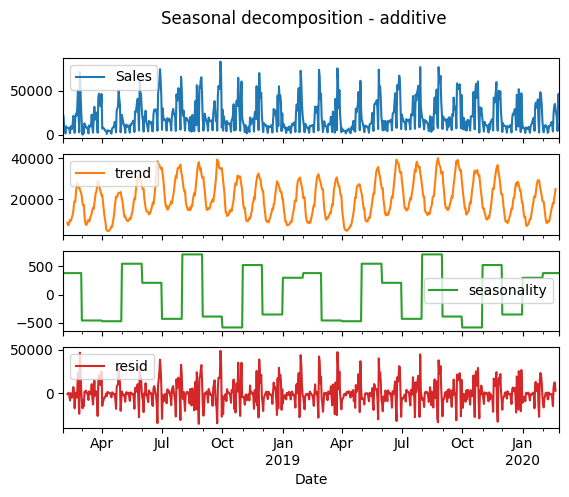

In [111]:
seasonal_df.loc[:, ["Sales", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - additive")


In [112]:
df=df.reset_index(['Date'])

In [113]:
df

,Date,Sales
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0
...,...,...
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3


In [114]:
# Extract features
df_copy = df.copy()

df_copy['date'] = df['Date']
df_copy['month'] = df_copy['date'].dt.strftime('%B')
df_copy['year'] = df_copy['date'].dt.strftime('%Y')
df_copy['dayofweek'] = df_copy['date'].dt.strftime('%A')
df_copy['quarter'] = df_copy['date'].dt.quarter
df_copy['dayofyear'] = df_copy['date'].dt.dayofyear
df_copy['dayofmonth'] = df_copy['date'].dt.day


In [115]:
df_copy.columns

Index(['Date', 'Sales', 'date', 'month', 'year', 'dayofweek', 'quarter',
       'dayofyear', 'dayofmonth'],
      dtype='object')

In [116]:
X = df_copy[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
y = df['Sales']


In [117]:
df_new = pd.concat([X, y], axis=1)
df_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,Sales
0,Thursday,1,February,2018,32,1,21199.0
1,Friday,1,February,2018,33,2,10634.0
2,Saturday,1,February,2018,34,3,7966.0
3,Sunday,1,February,2018,35,4,1353.0
4,Monday,1,February,2018,36,5,9497.0


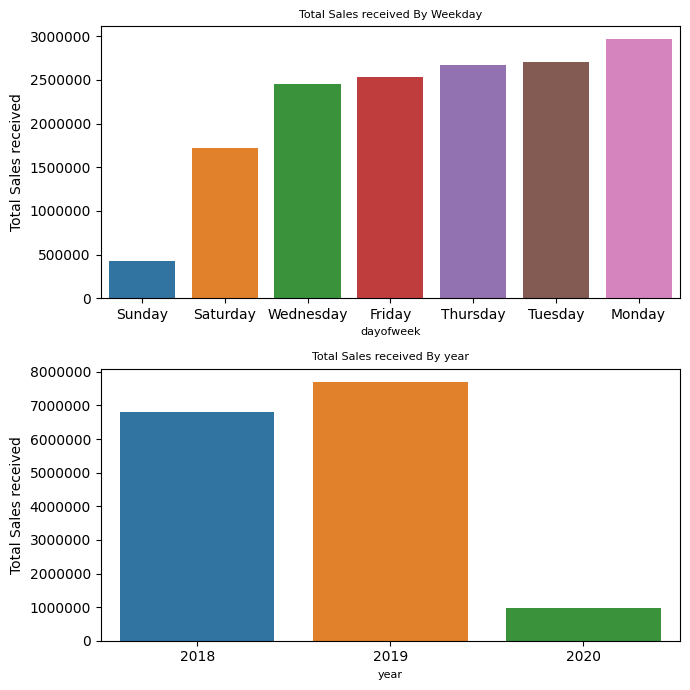

In [118]:
# fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(7,7)

week_day_Aggregated = pd.DataFrame(df_new.groupby("dayofweek")["Sales"].sum()).reset_index().sort_values('Sales')
sns.barplot(data=week_day_Aggregated,x="dayofweek",y="Sales",hue = 'dayofweek',ax=ax1,dodge=False)
ax1.set(xlabel='dayofweek', ylabel='Total Sales received')
ax1.xaxis.label.set_size(8)
ax1.set_title("Total Sales received By Weekday",fontsize=8)
ax1.ticklabel_format(style='plain',axis='y')



yearAggregated = pd.DataFrame(df_new.groupby("year")["Sales"].sum()).reset_index()
sns.barplot(data=yearAggregated,x="year",y="Sales",hue='year',ax=ax2)
ax2.set(xlabel='year', ylabel='Total Sales received')
ax2.xaxis.label.set_size(8)
ax2.set_title("Total Sales received By year",fontsize=8)
ax2.ticklabel_format(style='plain',axis='y')

fig.tight_layout()

In [119]:
# Train test split

In [120]:
df=df.rename(columns={'Date':'ds','Sales':'y'})
df.tail()


,ds,y
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3
755,2020-02-26,46703.0


In [121]:
end_date = '2019-12-31'
X_tr = df.loc[df['ds'] <= end_date]
X_tst = df.loc[df['ds'] > end_date]

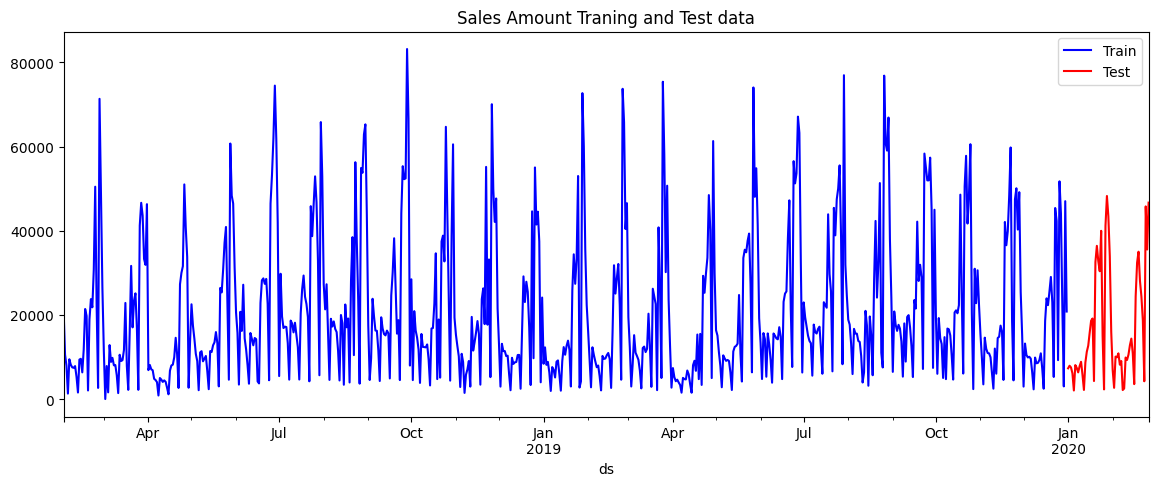

In [122]:
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
X_tr.plot(kind='line', x='ds', y='y', color='blue', label='Train', ax=ax)
X_tst.plot(kind='line', x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Sales Amount Traning and Test data')
plt.show()

In [123]:
# Modelling

In [124]:
model =Prophet()
model.fit(X_tr)

10:34:43 - cmdstanpy - INFO - Chain [1] start processing
10:34:43 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
len(X_tst)

57

In [126]:
X_tst

,ds,y
699,2020-01-01,7353.6
700,2020-01-02,7959.7
701,2020-01-03,7559.3
702,2020-01-04,6162.3
703,2020-01-05,2085.9
704,2020-01-06,8120.0
705,2020-01-07,7464.4
706,2020-01-08,6385.6
707,2020-01-09,7873.0
708,2020-01-10,8899.9


In [127]:
future = model.make_future_dataframe(periods=57, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-02-01,22910.625983,4551.256120,41283.555160
1,2018-02-02,21601.969576,3667.550411,40236.494390
2,2018-02-03,14070.261151,-4997.446968,33411.198227
3,2018-02-04,1665.287835,-17401.652241,20795.099193
4,2018-02-05,25526.752504,6392.873338,45809.851831


In [128]:
future_2 = model.make_future_dataframe(periods=60)
forecast_2 = model.predict(future_2)
forecast_2[['ds', 'yhat']].tail(5)

,ds,yhat
754,2020-02-25,27921.537295
755,2020-02-26,25523.015870
756,2020-02-27,28090.583648
757,2020-02-28,26781.925639
758,2020-02-29,19250.215613


In [129]:
X_tst_forecast = model.predict(X_tst[['ds']])
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28042.623436,8137.645201,46049.860110
51,2020-02-21,26733.965427,6028.678362,45089.537745
52,2020-02-22,19202.255401,-213.247326,39326.681889
53,2020-02-23,6797.280483,-10702.166872,25931.613800
54,2020-02-24,30658.743551,11743.427678,50390.599167
55,2020-02-25,27921.537295,8643.438120,46838.211810
56,2020-02-26,25523.015870,6181.552700,45520.881139


In [130]:
X_tst_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,23191.075746,4472.453251,44828.017775,23191.075746,23191.075746,1948.258427,1948.258427,1948.258427,1948.258427,1948.258427,1948.258427,0.0,0.0,0.0,25139.334174
1,2020-01-02,23197.927205,8524.855414,47462.036271,23197.927205,23197.927205,4508.974746,4508.974746,4508.974746,4508.974746,4508.974746,4508.974746,0.0,0.0,0.0,27706.901951
2,2020-01-03,23204.778664,7431.510138,46958.487119,23204.778664,23204.778664,3193.465279,3193.465279,3193.465279,3193.465279,3193.465279,3193.465279,0.0,0.0,0.0,26398.243943
3,2020-01-04,23211.630123,284.559956,37692.819347,23211.630123,23211.630123,-4345.096206,-4345.096206,-4345.096206,-4345.096206,-4345.096206,-4345.096206,0.0,0.0,0.0,18866.533916
4,2020-01-05,23218.481582,-11947.087817,25361.444264,23218.481582,23218.481582,-16756.922583,-16756.922583,-16756.922583,-16756.922583,-16756.922583,-16756.922583,0.0,0.0,0.0,6461.558998
5,2020-01-06,23225.333041,10092.864000,50266.966418,23225.333041,23225.333041,7097.689026,7097.689026,7097.689026,7097.689026,7097.689026,7097.689026,0.0,0.0,0.0,30323.022067
6,2020-01-07,23232.184499,6509.773845,47404.722014,23232.184492,23232.184499,4353.631311,4353.631311,4353.631311,4353.631311,4353.631311,4353.631311,0.0,0.0,0.0,27585.815810
7,2020-01-08,23239.035958,7095.863955,44180.835176,23239.035932,23239.035967,1948.258427,1948.258427,1948.258427,1948.258427,1948.258427,1948.258427,0.0,0.0,0.0,25187.294386
8,2020-01-09,23245.887417,9042.752731,45736.691683,23245.887366,23245.887447,4508.974746,4508.974746,4508.974746,4508.974746,4508.974746,4508.974746,0.0,0.0,0.0,27754.862164
9,2020-01-10,23252.738876,8266.620052,45129.899696,23252.738794,23252.738934,3193.465279,3193.465279,3193.465279,3193.465279,3193.465279,3193.465279,0.0,0.0,0.0,26446.204155


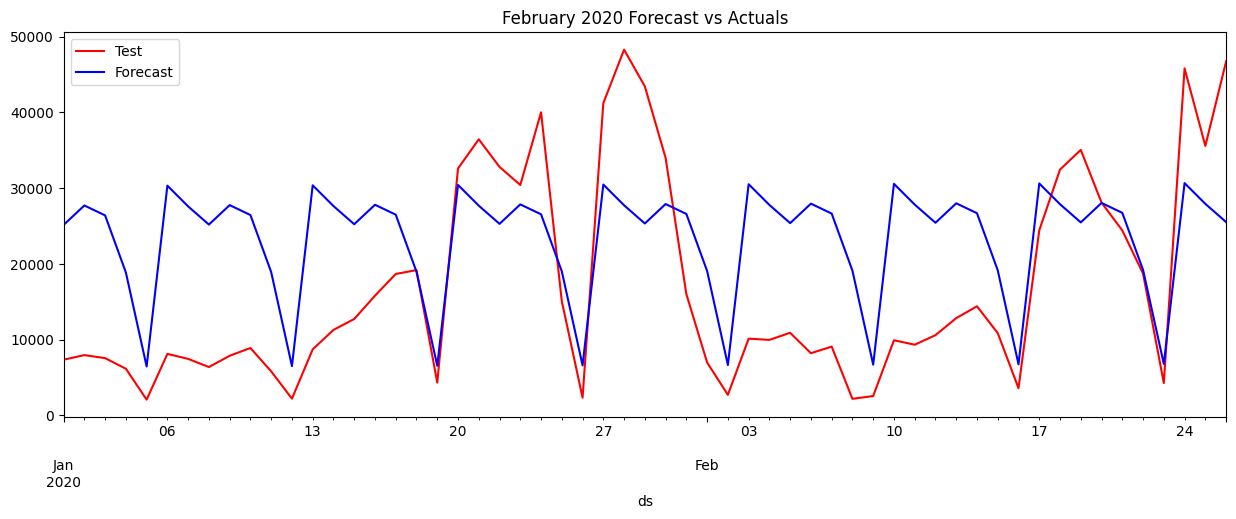

In [131]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title('February 2020 Forecast vs Actuals')
plt.show()

In [132]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",mape)

MAPE 1.2930071264429077


In [133]:
# Add Holidays import holidays which is a different libraries
# Handdling holidays

In [134]:
import holidays

In [136]:
india_holidays = holidays.India(years = 2018)

holiday_india_df = pd.DataFrame([])

for date, name in sorted(india_holidays.items()):
    print(date, name) 
    holiday_india_df = holiday_india_df._append(pd.DataFrame({'ds': date, 'holiday': name}, index=[0]), ignore_index=True)


2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-05-01 Labour Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [137]:
holiday_india_df

,ds,holiday
0,2018-01-14,Makar Sankranti / Pongal
1,2018-01-26,Republic Day
2,2018-03-02,Holi
3,2018-03-25,Palm Sunday
4,2018-03-30,Good Friday
5,2018-04-01,Easter Sunday
6,2018-05-01,Labour Day
7,2018-05-20,Feast of Pentecost
8,2018-06-15,Eid ul-Fitr (estimated)
9,2018-06-16,Eid ul-Fitr (estimated)


In [139]:
india_holidays_mh = holidays.India(years = 2018,subdiv='MH')

holiday_india_mh = pd.DataFrame([])

for date, name in sorted(india_holidays_mh.items()):
    print(date, name) 
    holiday_india_mh = holiday_india_mh._append(pd.DataFrame({'ds': date, 'holiday': name}, index=[0]), ignore_index=True)

2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-04-14 Dr. B. R. Ambedkar's Jayanti
2018-05-01 Labour Day; Maharashtra Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-10-15 Dussehra
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [ ]:
holiday_india_mh

,ds,holiday
0,2018-01-14,Makar Sankranti / Pongal
1,2018-01-26,Republic Day
2,2018-03-02,Holi
3,2018-03-25,Palm Sunday
4,2018-03-30,Good Friday
5,2018-04-01,Easter Sunday
6,2018-04-14,Dr. B. R. Ambedkar's Jayanti
7,2018-05-01,Labour Day; Maharashtra Day
8,2018-05-20,Feast of Pentecost
9,2018-06-15,Eid ul-Fitr* (*estimated)


In [141]:
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2018,2019,2020]).items()):
    holiday = holiday._append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')


C:\Users\harsh\AppData\Local\Temp\ipykernel_31632\1167995665.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')


In [ ]:
holiday.tail(7)

,ds,holiday
25,2020-07-03,US-Holidays
26,2020-07-04,US-Holidays
27,2020-09-07,US-Holidays
28,2020-10-12,US-Holidays
29,2020-11-11,US-Holidays
30,2020-11-26,US-Holidays
31,2020-12-25,US-Holidays


In [142]:
holiday_2 = pd.DataFrame([])

for date, name in sorted(holidays.India(years=[2018,2019,2020]).items()):
    holiday_2 = holiday_2._append(pd.DataFrame({'ds': date, 'holiday': "India-Holidays"}, index=[0]), ignore_index=True)
holiday_2['ds'] = pd.to_datetime(holiday_2['ds'], format='%Y-%m-%d', errors='ignore')

C:\Users\harsh\AppData\Local\Temp\ipykernel_31632\2251978101.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday_2['ds'] = pd.to_datetime(holiday_2['ds'], format='%Y-%m-%d', errors='ignore')


In [ ]:
# if the freq does not match then we will extract some feature like month day and then match it with holidays
# We can add holidays by using method we need to add country name as well
# it is to be done before fitting the model

In [143]:
m_2 = Prophet()
m_2.add_country_holidays(country_name='IN')
m_2.fit(df)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
10:36:19 - cmdstanpy - INFO - Chain [1] start processing
10:36:19 - cmdstanpy - INFO - Chain [1] done processing


In [144]:
m_2.train_holiday_names

0      Makar Sankranti / Pongal
1                  Republic Day
2              Independence Day
3                Gandhi Jayanti
4                    Labour Day
5                        Diwali
6                          Holi
7     Day of Ashura (estimated)
8            Mawlid (estimated)
9       Eid ul-Fitr (estimated)
10      Eid al-Adha (estimated)
11                  Palm Sunday
12                  Good Friday
13                Easter Sunday
14           Feast of Pentecost
15                Christmas Day
dtype: object

In [ ]:
# fit with holidays

In [145]:
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)


10:36:23 - cmdstanpy - INFO - Chain [1] start processing
10:36:23 - cmdstanpy - INFO - Chain [1] done processing


In [146]:
future_holiday = model_with_holidays.make_future_dataframe(periods=57, freq='D')
forecast_holiday = model_with_holidays.predict(future_holiday)
forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
749,2020-02-20,28244.416241,9389.073228,48237.648309
750,2020-02-21,26893.962960,7097.880653,46350.656517
751,2020-02-22,19356.409862,1122.651856,37513.823505
752,2020-02-23,6955.490229,-12480.789954,24971.538209
753,2020-02-24,30969.655091,12655.699970,49248.825521
754,2020-02-25,28108.451443,8180.742432,46859.640378
755,2020-02-26,25711.008916,6161.508063,44108.975956


In [147]:
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28244.416241,9129.830670,48375.719578
51,2020-02-21,26893.962960,8702.065431,47669.696886
52,2020-02-22,19356.409862,934.202482,38050.564239
53,2020-02-23,6955.490229,-12460.826473,26002.594349
54,2020-02-24,30969.655091,11532.572676,50919.105537
55,2020-02-25,28108.451443,8485.937153,48351.602125
56,2020-02-26,25711.008916,5701.397855,45144.092365


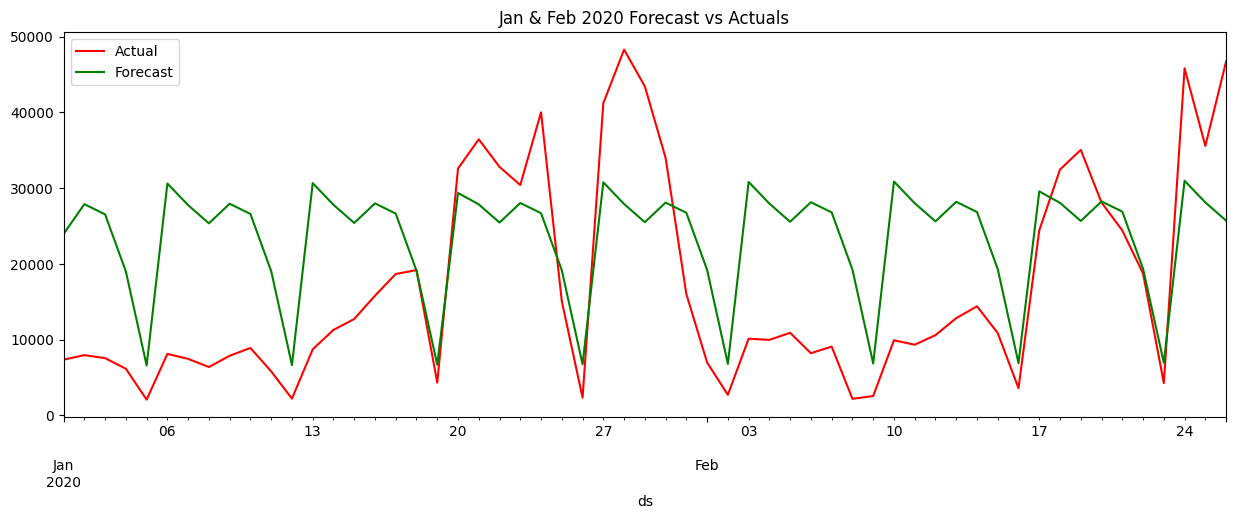

In [148]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

In [149]:
mape_holiday = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast_holiday['yhat'])
print("MAPE",round(mape_holiday,4))

MAPE 1.3068


In [151]:
holiday

,ds,holiday
0,2018-01-01,US-Holidays
1,2018-01-15,US-Holidays
2,2018-02-19,US-Holidays
3,2018-05-28,US-Holidays
4,2018-07-04,US-Holidays
5,2018-09-03,US-Holidays
6,2018-10-08,US-Holidays
7,2018-11-11,US-Holidays
8,2018-11-12,US-Holidays
9,2018-11-22,US-Holidays


In [ ]:
# Hyperparameter tunning

In [ ]:
#Important points to remembers which I found on internet

# n_changepoints is the number of change happen in the data. Prophet model detects them by its own. By default, its value is 25, which are uniformly placed in the first 80% of the time series. Changing n_changepoints can add value to the model.

# changepoint_prior_scale to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If you make it high it will be more flexible, but you can end up overfitting. By default, this parameter is set to 0.05

# seasonality_mode There are 2 types model seasonality mode. Additive & multiplicaticative. By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the model.

# holiday_prior_scale just like changepoint_prior_scale, holiday_prior_scale is used to smoothning the effect of holidays. By default its value is 10, which provides very little regularization. Reducing this parameter dampens holiday effects

# Seasonalities with fourier_order Prophet model, by default finds the seasonalities and adds the default parameters of the seasonality. We can modify the seasonalities effect by adding custom seasonalities as add_seasonality in the model with different fourier order.Yy default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality.
# seasonality_weekly / seasonality_weekly = True / Fl


In [150]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],
              'holidays_prior_scale':[0.1,0.2,0.3],
              'n_changepoints' : [100,150]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 36


In [ ]:
%%timeit
strt='2019-12-31'
end='2020-02-26'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()


,MAPE,Parameters
0,1.018588,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,1.019445,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,1.030222,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,1.030403,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,1.035037,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [ ]:
parameters['Parameters'][0]


In [ ]:
parameters['Parameters'][0]


{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.2,
 'n_changepoints': 100,
 'seasonality_mode': 'multiplicative'}

In [ ]:
# Taking best params

In [ ]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.1,
                      holidays_prior_scale = 0.2,
                      n_changepoints = 100,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='US')
final_model.fit(X_tr)


C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
future = final_model.make_future_dataframe(periods=122, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
814,2020-04-25,11570.158955,-18126.253731,39347.461173
815,2020-04-26,-1581.778565,-27757.135327,24801.105125
816,2020-04-27,25250.243828,-3308.382270,56401.123372
817,2020-04-28,22600.332466,-5472.809306,52546.441312
818,2020-04-29,20385.187729,-5772.071330,48730.417441
819,2020-04-30,22991.206545,-5367.901913,50217.052424
820,2020-05-01,22308.067864,-5316.780078,48451.690599


C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


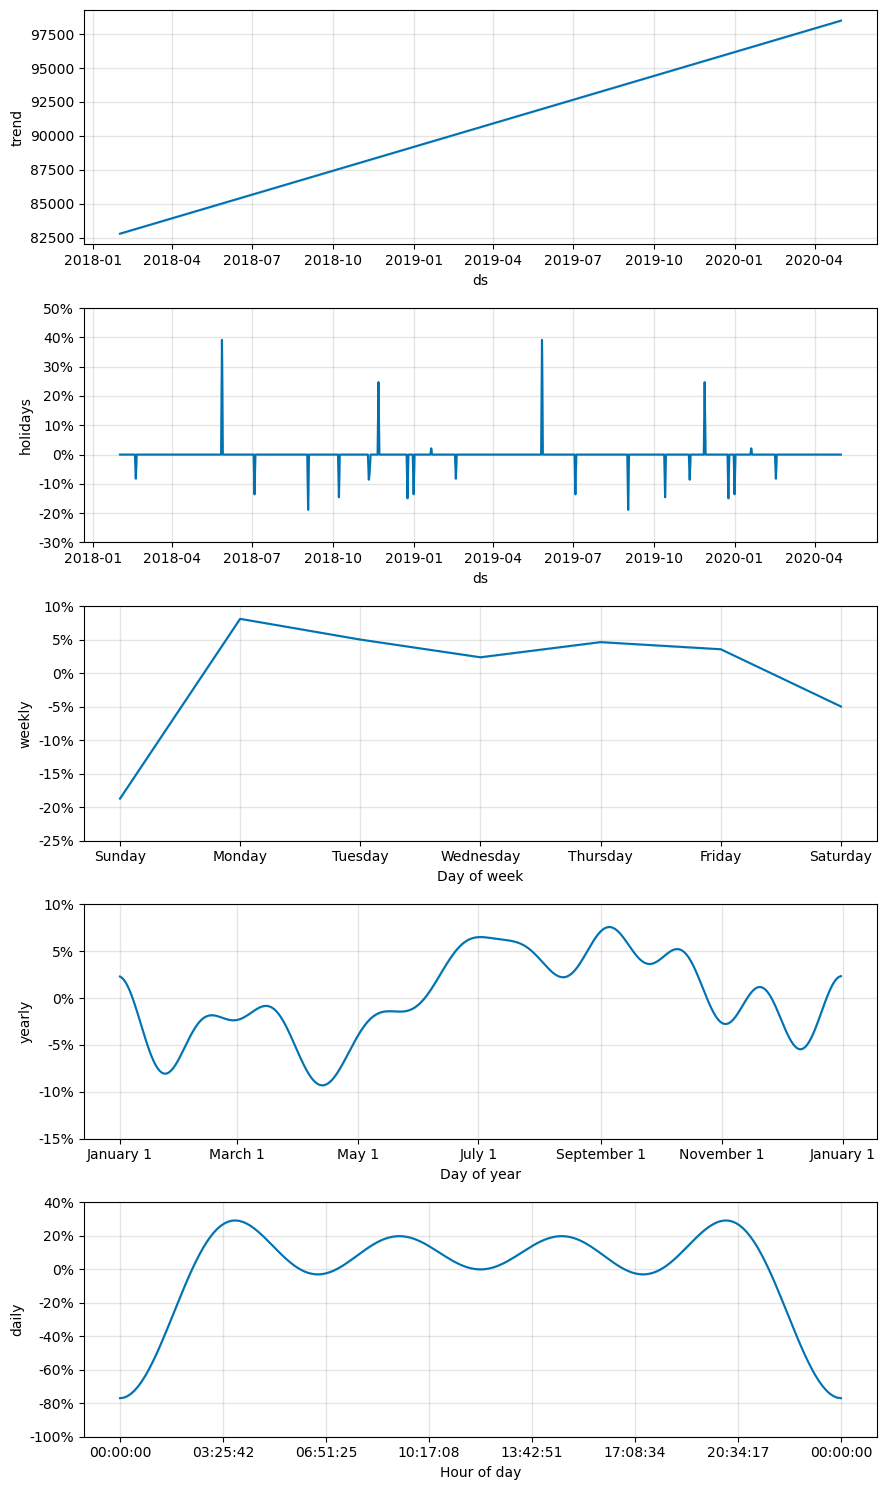

In [ ]:
fig =final_model.plot_components(forecast)


C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



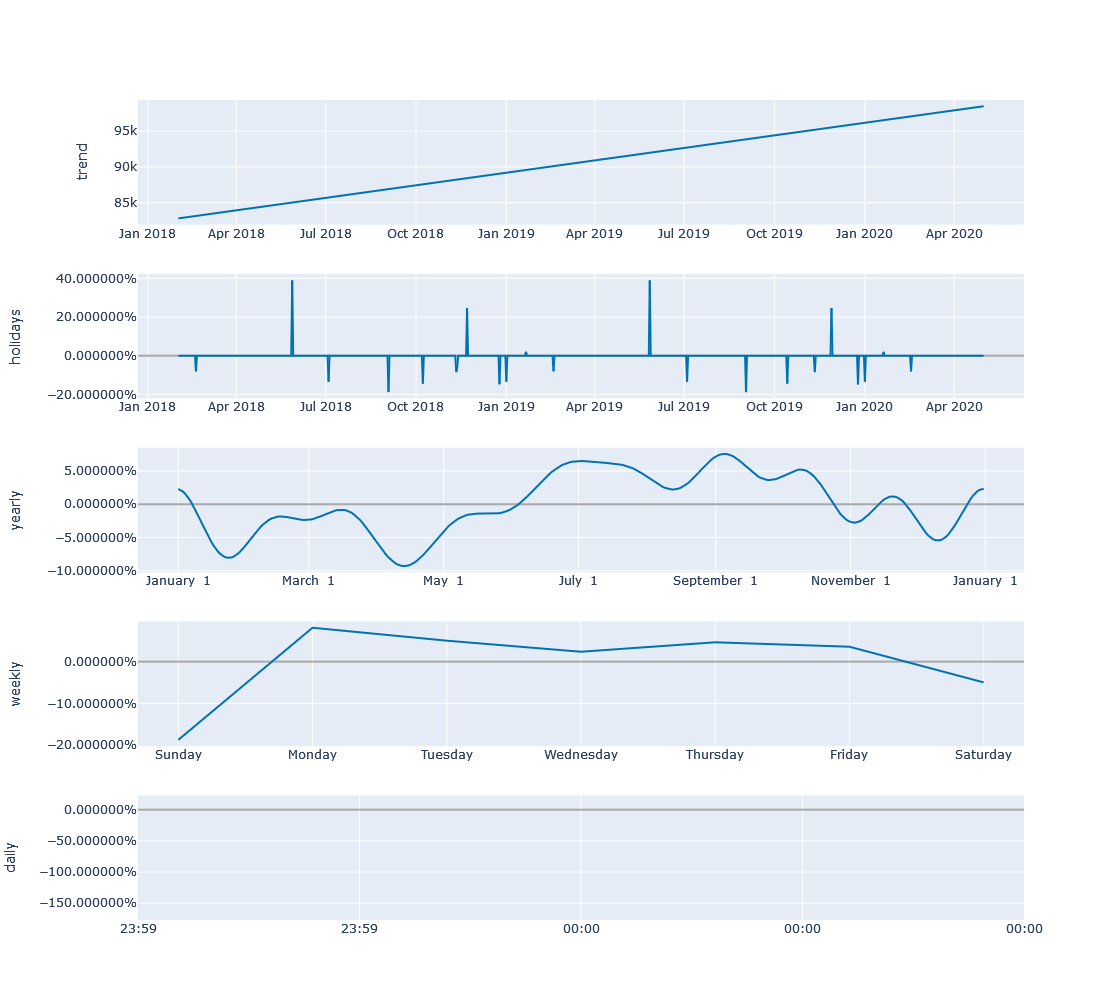

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_components_plotly(final_model,forecast)

In [ ]:
X_tst_final= final_model.predict(X_tst)
X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\admin\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,25012.688367,-3927.743590,52601.283700
51,2020-02-21,23920.708576,-4619.669235,51432.583538
52,2020-02-22,15548.475709,-10521.367705,45160.897732
53,2020-02-23,2094.672210,-24638.174723,28174.038380
54,2020-02-24,28137.545625,-20.082518,57290.213590
55,2020-02-25,25071.760521,-3288.800952,51972.728730
56,2020-02-26,22455.906883,-4906.012667,50467.596026


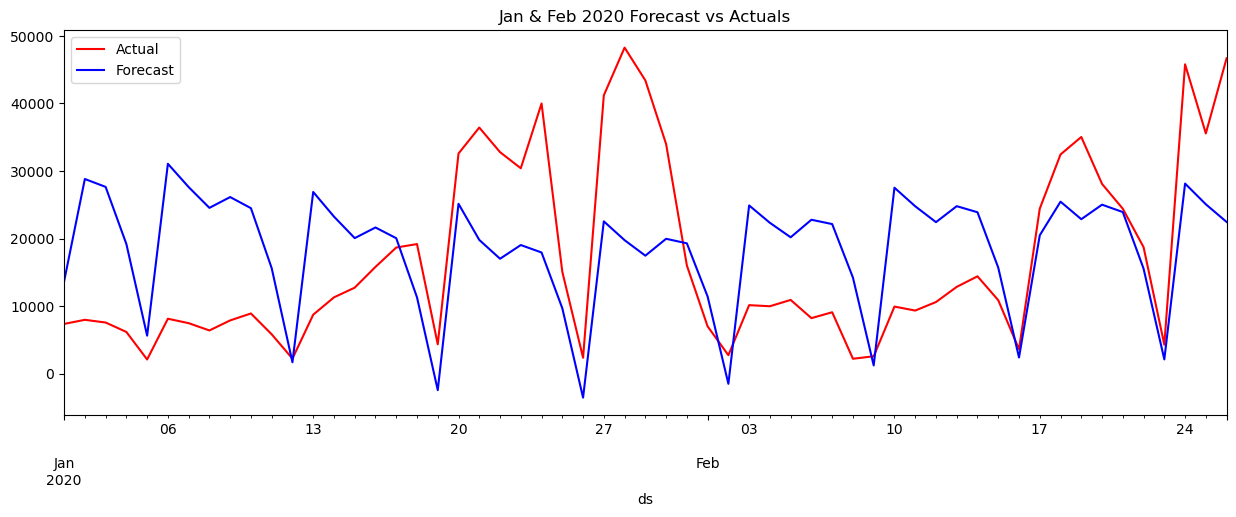

In [ ]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_final.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()


In [ ]:
MAPE = mean_absolute_percentage_error(X_tst['y'],abs(X_tst_final['yhat']))
print('MAPE', MAPE)

MAPE 1.0185879796866368


In [ ]:
X_tr

,ds,y
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0
...,...,...
694,2019-12-27,44154.6
695,2019-12-28,21527.6
696,2019-12-29,3058.5
697,2019-12-30,47041.5


<AxesSubplot:>

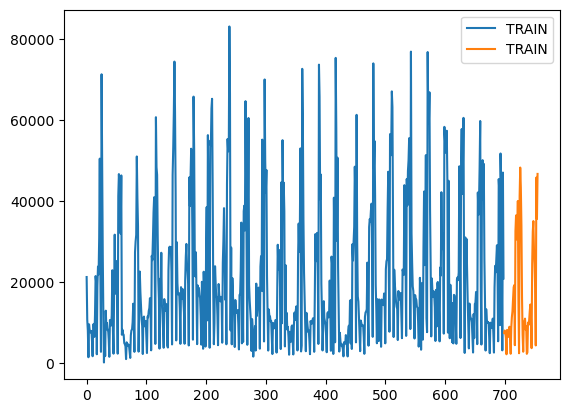

In [ ]:
X_tr['y'].plot(x='ds', legend=True, label='TRAIN')
X_tst['y'].plot(x='ds', legend=True, label='TRAIN')


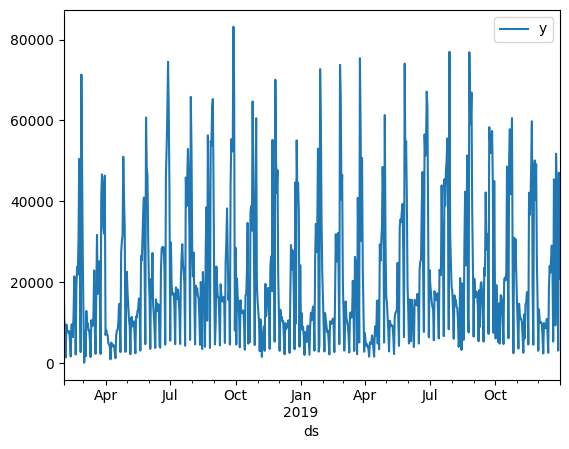

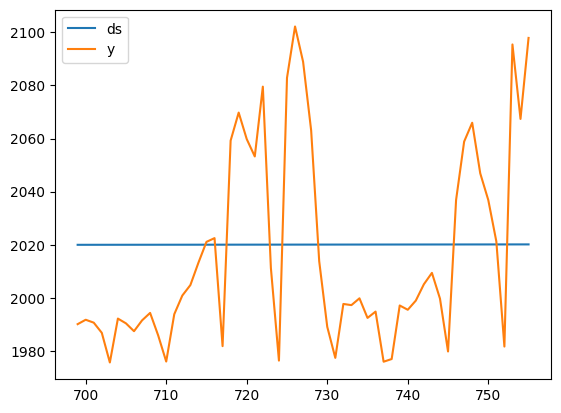

In [153]:
X_tr.set_index('ds').plot(legend=True,label='TRAIN')
X_tst.plot(legend=True,label='TEST')
plt.show()


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-02-01,82796.309827,-12749.877136,46470.731598,82796.309827,82796.309827,0.0,0.0,0.0,0.0,...,0.046359,0.046359,0.046359,-0.060842,-0.060842,-0.060842,0.0,0.0,0.0,17883.783582
1,2018-02-02,82815.447309,-10676.345728,46042.924902,82815.447309,82815.447309,0.0,0.0,0.0,0.0,...,0.035733,0.035733,0.035733,-0.056593,-0.056593,-0.056593,0.0,0.0,0.0,17359.798632
2,2018-02-03,82834.584791,-17291.040611,36682.307317,82834.584791,82834.584791,0.0,0.0,0.0,0.0,...,-0.049739,-0.049739,-0.049739,-0.052259,-0.052259,-0.052259,0.0,0.0,0.0,10642.750217
3,2018-02-04,82853.722273,-28995.881785,25872.236520,82853.722273,82853.722273,0.0,0.0,0.0,0.0,...,-0.187449,-0.187449,-0.187449,-0.047931,-0.047931,-0.047931,0.0,0.0,0.0,-405.958016
4,2018-02-05,82872.859755,-9084.832972,49343.579176,82872.859755,82872.859755,0.0,0.0,0.0,0.0,...,0.081165,0.081165,0.081165,-0.043695,-0.043695,-0.043695,0.0,0.0,0.0,22205.832921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2020-04-27,98413.963480,-3308.382270,56401.123372,98413.948035,98413.978703,0.0,0.0,0.0,0.0,...,0.081165,0.081165,0.081165,-0.055074,-0.055074,-0.055074,0.0,0.0,0.0,25250.243828
817,2020-04-28,98433.102857,-5472.809306,52546.441312,98433.087152,98433.118294,0.0,0.0,0.0,0.0,...,0.050197,0.050197,0.050197,-0.051076,-0.051076,-0.051076,0.0,0.0,0.0,22600.332466
818,2020-04-29,98452.242234,-5772.071330,48730.417441,98452.226271,98452.257916,0.0,0.0,0.0,0.0,...,0.023734,0.023734,0.023734,-0.047158,-0.047158,-0.047158,0.0,0.0,0.0,20385.187729
819,2020-04-30,98471.381612,-5367.901913,50217.052424,98471.365393,98471.397477,0.0,0.0,0.0,0.0,...,0.046359,0.046359,0.046359,-0.043358,-0.043358,-0.043358,0.0,0.0,0.0,22991.206545


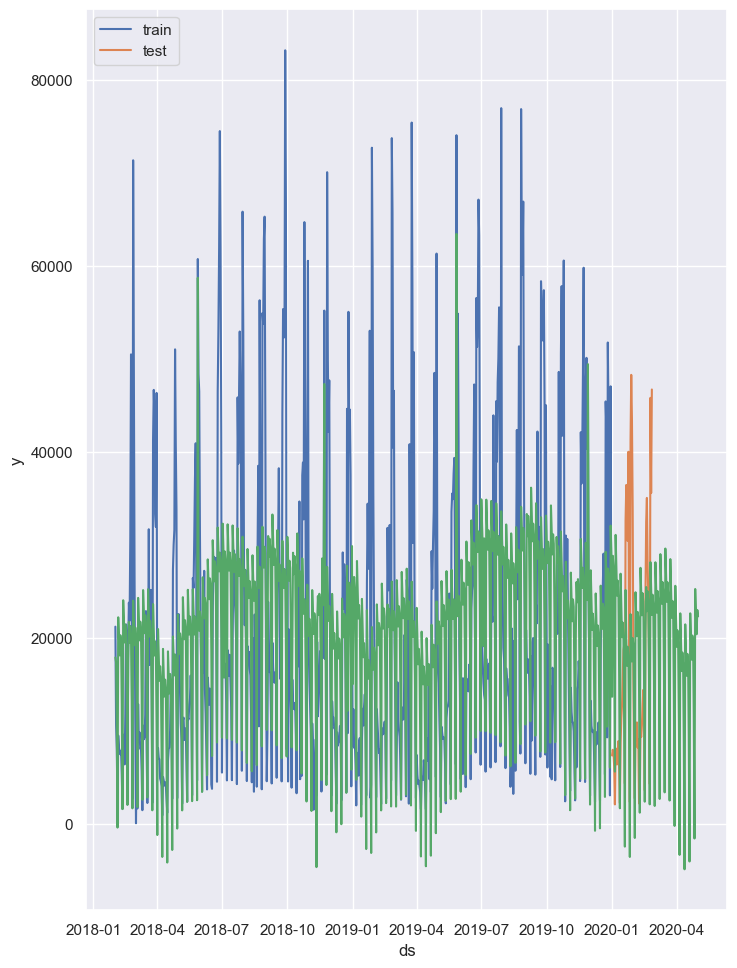

In [ ]:
sns.lineplot(x=X_tr['ds'], y=X_tr['y'])
sns.lineplot(x=X_tst['ds'], y=X_tst['y'])
sns.lineplot(x=forecast['ds'], y=forecast['yhat'])

plt.legend(['train','test'],
            loc='upper left')
sns.set_theme(rc={'figure.figsize': (8.27, 11.7)})
